# Step 0 - Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1 - Read the data

In [ ]:
from google.colab import files          #Upload hour.csv from the "Kaggel Project" folder of the course 
uploaded = files.upload()

Saving hour.csv to hour.csv


In [ ]:
data = pd.read_csv('hour.csv')
data.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Step 2 - Prelim Analysis and Feature selection

In this dataset: 

There are no null values

All numerical values are normalized already

There are no categorical variables (They are already assigned an integer)

##Remove irrelevant variables

In [ ]:
data = data.drop(['index', 'date', 'casual', 'registered'], axis=1)

##Null Values

In [ ]:
data.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

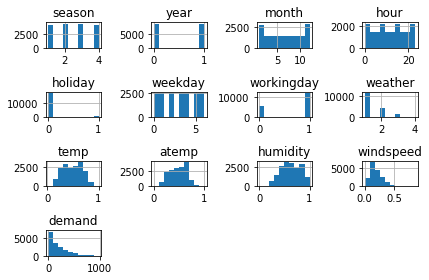

In [ ]:
data.hist()
plt.tight_layout()
plt.show()

# Step 3 - Data Visualisation

**Visualise the continuous features Vs demand(the target variable)**

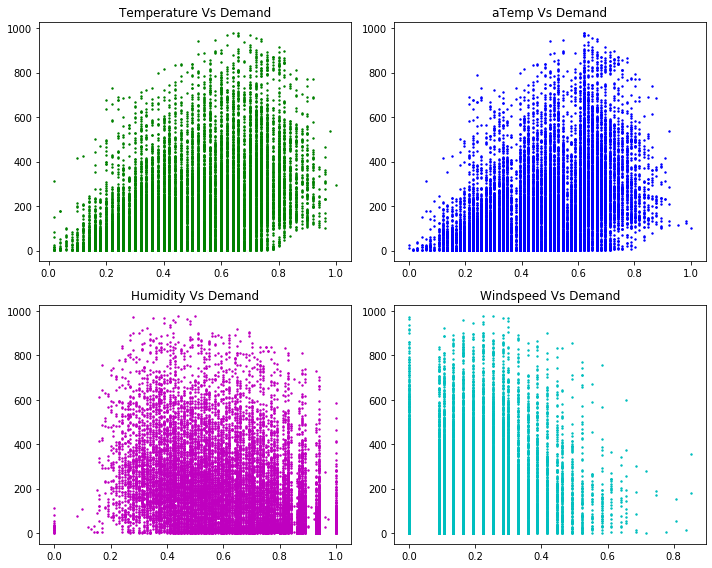

In [ ]:
fig = plt.figure(figsize=[10,8])

fig.add_subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(data['temp'], data['demand'], s=2, c='g')

fig.add_subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(data['atemp'], data['demand'], s=2, c='b')

fig.add_subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(data['humidity'], data['demand'], s=2, c='m')

fig.add_subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(data['windspeed'], data['demand'], s=2, c='c')

plt.tight_layout()

**# Visualise the categorical features**

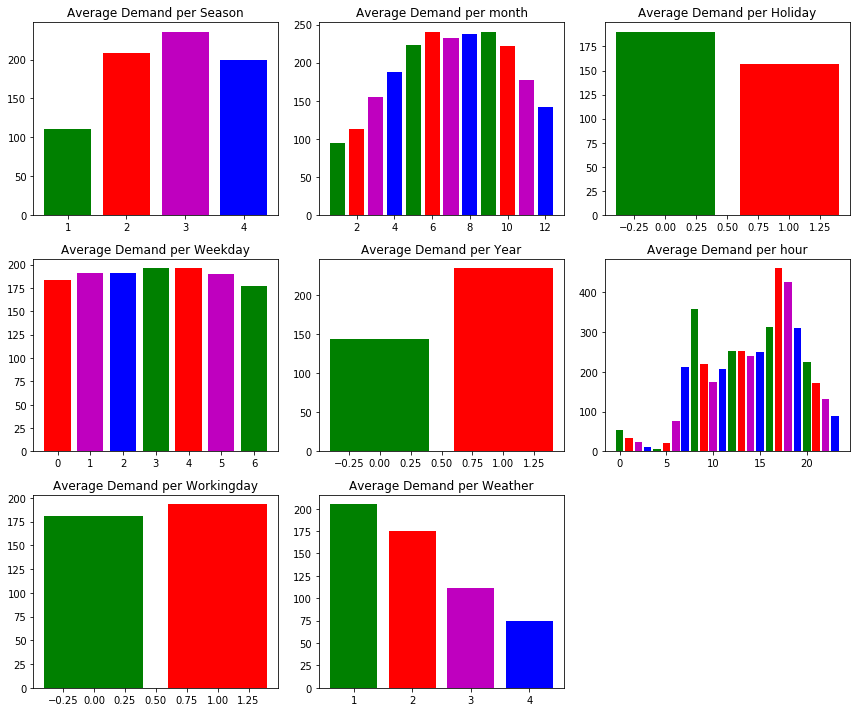

In [ ]:
fig = plt.figure(figsize=[12,10])

colors = ['g', 'r', 'm', 'b']

fig.add_subplot(3,3,1)
plt.title('Average Demand per Season')
cat_list = data['season'].unique()
cat_average = data.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

fig.add_subplot(3,3,2)
plt.title('Average Demand per month')
cat_list = data['month'].unique()
cat_average = data.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

fig.add_subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list = data['holiday'].unique()
cat_average = data.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

fig.add_subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list = data['weekday'].unique()
cat_average = data.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

fig.add_subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list = data['year'].unique()
cat_average = data.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

fig.add_subplot(3,3,6)
plt.title('Average Demand per hour')
cat_list = data['hour'].unique()
cat_average = data.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

fig.add_subplot(3,3,7)
plt.title('Average Demand per Workingday')
cat_list = data['workingday'].unique()
cat_average = data.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

fig.add_subplot(3,3,8)
plt.title('Average Demand per Weather')
cat_list = data['weather'].unique()
cat_average = data.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()


We would remove "Workingday", "Weekday" and "year". the first two because the average demand does not depend on them. Year because we dont have enough number of years

In [ ]:
data = data.drop(['weekday', 'year', 'workingday'], axis=1)  

**check quantiles for outliers**

In [ ]:
data['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [ ]:
data['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])  

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

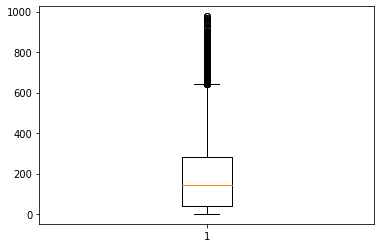

In [ ]:
plt.boxplot(data['demand'])
plt.show()

# Step 4 - Check Multiple Linear Regression Assumptions

**Linearity using correlation coefficient matrix using corr**

In [ ]:
#Select numerical values (Continous ones)
correlation = data[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()
correlation
#notice that there is multi-colinearity between "temp" and "atemp", so one should be deleted. We drop "atemp" because it has smaller correlation with "demand"
#Also, "windspeed" has a very small correlation with the target variable; thus droped from the dataset

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


**Correlation Matrix: Heat Map**

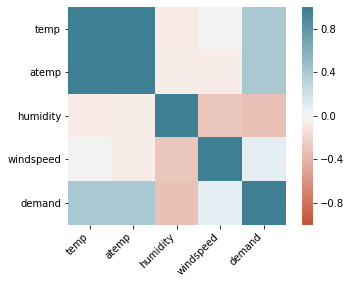

In [ ]:
#Use this piece of code to get a fancy correlation matrix
import seaborn as sns

ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#Or use this single-line code to get correlation matrix with values
correlation = data[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()
correlation.style.background_gradient(cmap='coolwarm')

,temp,atemp,humidity,windspeed,demand
temp,1,0.987672,-0.0698814,-0.0231253,0.404772
atemp,0.987672,1,-0.0519177,-0.062336,0.400929
humidity,-0.0698814,-0.0519177,1,-0.290105,-0.322911
windspeed,-0.0231253,-0.062336,-0.290105,1,0.0932338
demand,0.404772,0.400929,-0.322911,0.0932338,1


In [ ]:
#Drop correlated features or the ones not correlated with target variable
data = data.drop([ 'atemp', 'windspeed'], axis=1)   

**Autocorrelation of demand using acor**

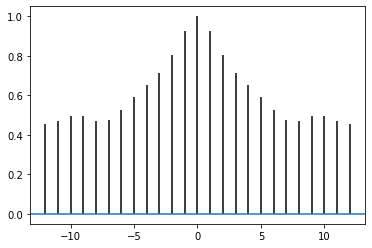

In [ ]:
demand_float = data['demand'].astype('float')
plt.acorr(demand_float, maxlags=12)
plt.show()
#notice that "demand" as the target variable has autocorrelation with previous 3 laged values which has to be taken care of

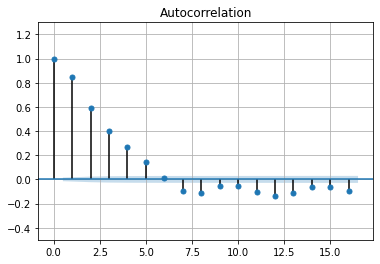

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

demand_float = data['demand'].astype('float')
plot_acf(demand_float , lags=16)  
plt.ylim(-0.5, 1.3)   
plt.grid()
plt.show()

**is the target variable "demand" Normally distributed??**

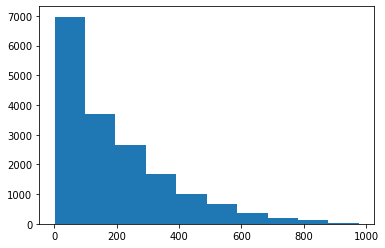

In [ ]:
plt.hist(data['demand'])
plt.show()
#target variable is NOT normally distributed. We guess that it might be log-normal, i.e. its log will be normally ditributed. Let's check:

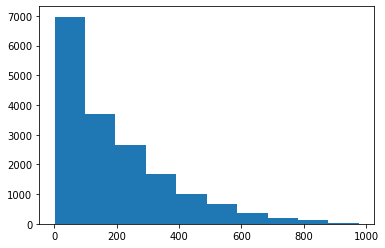

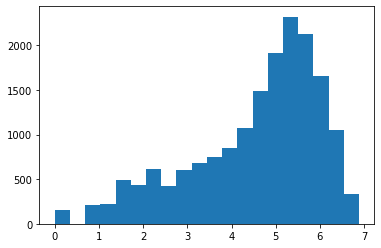

In [ ]:
# let's compare distribution of "demand" with distribution of log("demand"). if log("demand") looks Normal, then "demand" is log-Normal

plt.figure()
plt.hist( data['demand'] )
plt.show()

df = np.log( data['demand'])
plt.figure()
plt.hist(df, bins=20 )
plt.show()


In [ ]:
#Since our guess was correct and "demand" IS actually log-normal, we transform it and use its log values which is Normally distributed
data['demand'] = np.log(data['demand'])

**Now that target variable became normalized, let's take care of AutoCorrelation**

In [ ]:
# Solve the problem of Autocorrelation
# Shift the demand by 3 lags

data['t1'] = data['demand'].shift(+1)
data['t2'] = data['demand'].shift(+2)
data['t3'] = data['demand'].shift(+3)
data.head(4)

,season,month,hour,holiday,weather,temp,humidity,demand,t1,t2,t3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589


In [ ]:
# But remember to drop rows with NAN values
data = data.dropna()

data.head(2)

,season,month,hour,holiday,weather,temp,humidity,demand,t1,t2,t3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


# Step 5 - Create Dummy Variables and drop first to avoid dummy variables trap

In [ ]:
data.dtypes

season         int64
month          int64
hour           int64
holiday        int64
weather        int64
temp         float64
atemp        float64
humidity     float64
windspeed    float64
demand         int64
dtype: object

In [ ]:
# - season
# - holiday
# - weather
# - month
# - hour

# First we need to change the type of these variables to "category" since currently they are integers
data['season'] = data['season'].astype('category')
data['month'] = data['month'].astype('category')
data['hour'] = data['hour'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['weather'] = data['weather'].astype('category')


#now we can apply pd.get_dummies to these "categorical" variables
data = pd.get_dummies(data, drop_first=True)  #it deletes the first dummie variable of each feature to avoid multi-collinearity between dummies

In [ ]:
data.head(2)

,temp,humidity,demand,t1,t2,t3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 6 - Create Train and test split

In [ ]:
Y = data[ ['demand'] ]             #this way Y would remain a dataframe but Y=data['demand'] would be a pandas series
X = data.drop(['demand'], axis=1)


# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = \
# train_test_split(X, Y, test_size = 0.3, random_state = 1234)

# But "Demand" is time-series type of data becasue we observed Autocorrelation, so we have to split as follows:

train_size = 0.7 * len(X)
train_size = int(train_size)

X_train = X.iloc[0 : train_size, :]
X_test = X.iloc[train_size : len(X), :]

Y_train = Y.iloc[0 : train_size, :]
Y_test = Y.iloc[train_size : len(Y), :]

# Step 7 - Fit and Score the model

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

rental_regressor = LinearRegression()
rental_regressor.fit(X_train, Y_train)


model_coefficients = rental_regressor.coef_
model_intercept    = rental_regressor.intercept_ 

R2_train = rental_regressor.score(X_train, Y_train)
R2_test  = rental_regressor.score(X_test, Y_test)


# Create Y Predictions
Y_predict = rental_regressor.predict(X_test)  # Y_predict would be a Pandas Series, lets convert it to Pandas DaraFrame
Y_predict = pd.DataFrame(Y_predict)



from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, Y_predict))


print('Coefficients are:\n' , model_coefficients)
print('Intercept is:'     , model_intercept)
print('R^2 for train set is:' , R2_train )
print('R^2 for test set is:' , R2_test )
print('RMSE is:' , rmse) 



Coefficients are:
 [[ 0.71080316 -0.0559322   0.85743079  0.00611777 -0.2302049   0.08818878
   0.12289885  0.18198974  0.03223414  0.0280066   0.0147914   0.04097767
  -0.08766006 -0.16577191 -0.14604356 -0.08284003 -0.06724419 -0.08480538
  -0.06064348 -0.17676321 -0.25478093 -0.5247821  -0.52597868  0.79069642
   0.95976031  0.79431355  0.85311622  0.25010064  0.39046758  0.939675
   0.94603705  0.68848682  0.64026306  0.80199342  1.00325582  1.16867589
   0.76355682  0.60025684  0.64316335  0.64683902  0.55366271  0.27028213
  -0.07077788 -0.04022527 -0.26520369  0.06028938]]
Intercept is: [0.77271027]
R^2 for train set is: 0.9195240591465778
R^2 for test set is: 0.9287151360253385
RMSE is: 0.38098800498170443


Often you may want to extract a summary of a regression model created using scikit-learn in Python.

**Unfortunately**, scikit-learn doesn’t offer many built-in functions to analyze the summary of a regression model since it’s typically only used for predictive purposes.

Although scikit-learn gives us the **regression coefficients** and **R-Square** of the model, we still don’t know the **overall F-statistic of the model**, the **p-values** of the individual regression coefficients, and other useful metrics that can help us understand how well the model fits the dataset.

So, if you’re interested in getting a summary of a regression model in Python, you have two options:

1. Use limited functions from scikit-learn.

2. Use **statsmodels instead**.

In [ ]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train) # adding a constant (intercept)
model = sm.OLS(Y_train, X_train2)
rental_regressor2 = model.fit()
print(rental_regressor2.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     3010.
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:42:49   Log-Likelihood:                -6710.7
No. Observations:               12163   AIC:                         1.352e+04
Df Residuals:                   12116   BIC:                         1.386e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7727      0.037     20.646      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**RMSLE**

In [ ]:
#Note that Y_test and Y_Predict are currently in log form (we transformed the target variable earlier)
#Now let's convert them back by taking exp() and setting them as "int"
Y_test_e = np.exp(Y_test).astype('int')
Y_predict_e = np.exp(Y_predict).astype('int')


log_a = np.log(Y_test_e + 1)
log_p = np.log(Y_predict_e + 1)
logs_diff_sqr = (log_a.reset_index()['demand'] -log_p.reset_index()[0])**2  # we have to reset index to be able to add up values log_a & log_p
                                                                            # log_a.reset_index() is still a dataframe and values cannot be added
                                                                            # log_a.reset_index()['demand'] is a Pamdas Series
                                                                            # log_p.reset_index()[0] is also a Pamdas Series
log_diff_sq_sum = logs_diff_sqr.sum()
RMSLE = np.sqrt(log_diff_sq_sum/len(Y_test))

print('RMESLE is:', RMSLE)


RMESLE is: 0.3668123438007828
